In [48]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
import pandas as pd

In [10]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [61]:
train_labels = tf.keras.utils.to_categorical(y_train, 10)
test_labels = tf.keras.utils.to_categorical(y_test, 10)

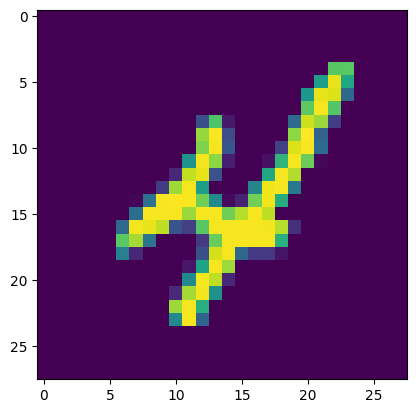

In [110]:
#plt.imshow(x_train[9,:,:])
plt.imshow(train_images[9,:,:])

In [62]:
train_images = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [54]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))



In [63]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = 'Accuracy')

In [64]:
model.fit(train_images ,test_labels, batch_size = 128 , epochs=5, validation_split = 0.2,verbose = 1)

Epoch 1/5
375/375 [==============================] - 57s 148ms/step - loss: 0.2672 - Accuracy: 0.9222 - val_loss: 0.0890 - val_Accuracy: 0.9732
Epoch 2/5
375/375 [==============================] - 45s 121ms/step - loss: 0.0732 - Accuracy: 0.9770 - val_loss: 0.0597 - val_Accuracy: 0.9827
Epoch 3/5
375/375 [==============================] - 58s 154ms/step - loss: 0.0504 - Accuracy: 0.9847 - val_loss: 0.0562 - val_Accuracy: 0.9823
Epoch 4/5
375/375 [==============================] - 60s 160ms/step - loss: 0.0391 - Accuracy: 0.9883 - val_loss: 0.0459 - val_Accuracy: 0.9861
Epoch 5/5
375/375 [==============================] - 47s 126ms/step - loss: 0.0335 - Accuracy: 0.9894 - val_loss: 0.0426 - val_Accuracy: 0.9868


In [67]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.0365 - Accuracy: 0.9875


[0.03647758439183235, 0.987500011920929]

In [68]:
results = model.predict(test_images)

313/313 [==============================] - 3s 8ms/step


In [81]:
results = pd.DataFrame(results.astype('int'))

In [82]:
results

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,0,0,0
9996,0,0,0,1,0,0,0,0,0,0
9997,0,0,0,0,1,0,0,0,0,0
9998,0,0,0,0,0,1,0,0,0,0


In [88]:
test_labels = pd.DataFrame(test_labels.astype('int'))

In [90]:
test_labels

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,0,0,0
9996,0,0,0,1,0,0,0,0,0,0
9997,0,0,0,0,1,0,0,0,0,0
9998,0,0,0,0,0,1,0,0,0,0


In [115]:
results.loc[10]

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: 10, dtype: int64

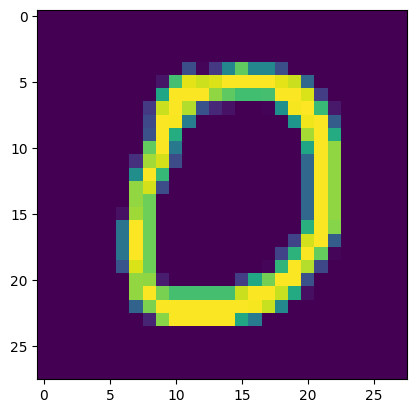

In [114]:
plt.imshow(test_images[10,:,:])